In [35]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting

In [36]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np
import keras.backend as K
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
from sklearn.datasets import make_multilabel_classification
# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [37]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = "../input/dataset/leapGestRecog/leapGestRecog"

In [38]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)    
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8),
 0]

In [39]:
# shuffle the input data
import random
random.shuffle(image_data)

In [40]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)
input_data[:5]

[array([[4, 5, 5, ..., 4, 6, 5],
        [6, 5, 6, ..., 5, 5, 3],
        [6, 6, 7, ..., 5, 6, 5],
        ...,
        [5, 6, 6, ..., 7, 7, 6],
        [5, 5, 5, ..., 8, 5, 6],
        [5, 5, 6, ..., 7, 7, 6]], dtype=uint8),
 array([[6, 5, 3, ..., 4, 4, 4],
        [4, 4, 6, ..., 4, 5, 4],
        [5, 6, 6, ..., 5, 5, 4],
        ...,
        [4, 4, 4, ..., 6, 5, 5],
        [5, 4, 4, ..., 5, 4, 4],
        [4, 5, 5, ..., 5, 4, 4]], dtype=uint8),
 array([[5, 5, 6, ..., 5, 5, 5],
        [6, 6, 7, ..., 5, 5, 5],
        [4, 6, 6, ..., 5, 5, 3],
        ...,
        [5, 4, 5, ..., 5, 4, 5],
        [5, 5, 6, ..., 4, 5, 4],
        [4, 5, 5, ..., 5, 4, 3]], dtype=uint8),
 array([[3, 5, 5, ..., 3, 4, 4],
        [5, 5, 6, ..., 3, 4, 3],
        [5, 5, 6, ..., 4, 5, 5],
        ...,
        [5, 6, 5, ..., 4, 3, 5],
        [4, 5, 5, ..., 4, 4, 5],
        [4, 5, 5, ..., 4, 4, 5]], dtype=uint8),
 array([[5, 6, 6, ..., 4, 5, 4],
        [6, 5, 7, ..., 4, 5, 5],
        [6, 5, 7, ..., 6, 5, 4

In [41]:
label[:10]

[1, 9, 8, 2, 0, 5, 0, 4, 7, 2]

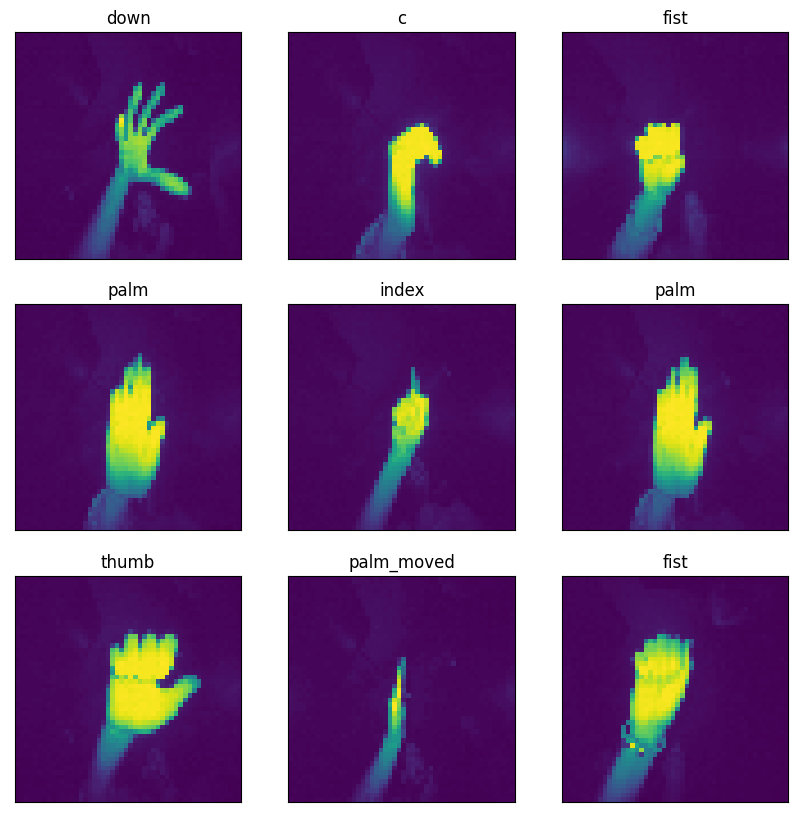

In [42]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0])
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
#plt.show()

In [43]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [44]:
from sklearn.datasets import make_multilabel_classification
X,y=make_multilabel_classification(n_samples=500,n_features=4,n_classes=2,n_labels=3,random_state=1)
X

array([[ 9., 12.,  6., 12.],
       [ 5.,  2., 12., 22.],
       [15.,  5., 12., 11.],
       ...,
       [ 5., 10., 15., 28.],
       [ 0.,  8., 16., 27.],
       [ 6.,  9., 13., 22.]])

In [45]:
X=(X-X.min())/(X.max()-X.min())
X

array([[0.20454545, 0.27272727, 0.13636364, 0.27272727],
       [0.11363636, 0.04545455, 0.27272727, 0.5       ],
       [0.34090909, 0.11363636, 0.27272727, 0.25      ],
       ...,
       [0.11363636, 0.22727273, 0.34090909, 0.63636364],
       [0.        , 0.18181818, 0.36363636, 0.61363636],
       [0.13636364, 0.20454545, 0.29545455, 0.5       ]])

In [46]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [47]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.10, random_state=0)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.10)
# X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape

In [49]:
y_train

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int8)

In [50]:

classes, counts = np.unique(y_train, return_counts=True)

classes

array([0, 1], dtype=int8)

In [51]:
# # Plotting class distribution
# plt.barh(CATEGORIES, counts)
# plt.title('Class distribution in training set')
# plt.xlabel('Count')
# plt.ylabel('Classes')
# plt.show()

In [52]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))

model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
         optimizer = 'rmsprop',
        #  optimizer = 'adam',
         metrics = ['accuracy'])
    

In [53]:
r = model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
563/563 [==============================] - 51s 89ms/step - loss: 0.3168 - accuracy: 0.8948 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 2/7
563/563 [==============================] - 50s 88ms/step - loss: 0.0170 - accuracy: 0.9951 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 3/7
563/563 [==============================] - 52s 92ms/step - loss: 0.0061 - accuracy: 0.9978 - val_loss: 3.4591e-05 - val_accuracy: 1.0000
Epoch 4/7
563/563 [==============================] - 49s 87ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 1.0184e-04 - val_accuracy: 1.0000
Epoch 5/7
563/563 [==============================] - 50s 88ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 1.3289e-05 - val_accuracy: 1.0000
Epoch 6/7
563/563 [==============================] - 46s 82ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 2.6981e-06 - val_accuracy: 1.0000
Epoch 7/7
563/563 [==============================] - 45s 80ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 2.2338e-06 - 

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 activation_3 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 activation_4 (Activation)   (None, 46, 46, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 23, 23, 32)        0         
                                                      

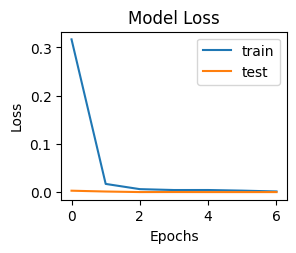

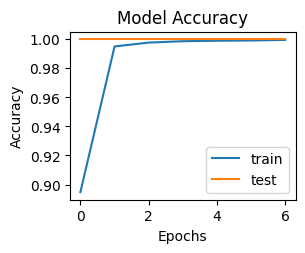

In [55]:
plt.subplot(2, 2, 1)
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [56]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

63/63 [==============================] - 1s 14ms/step - loss: 2.2338e-06 - accuracy: 1.0000
Test accuracy: 100.00%


In [57]:
# val_loss, val_accuracy = model.evaluate(X_val, y_val)

# print('Val accuracy: {:2.2f}%'.format(val_accuracy*100))

63/63 [==============================] - 1s 14ms/step


[]

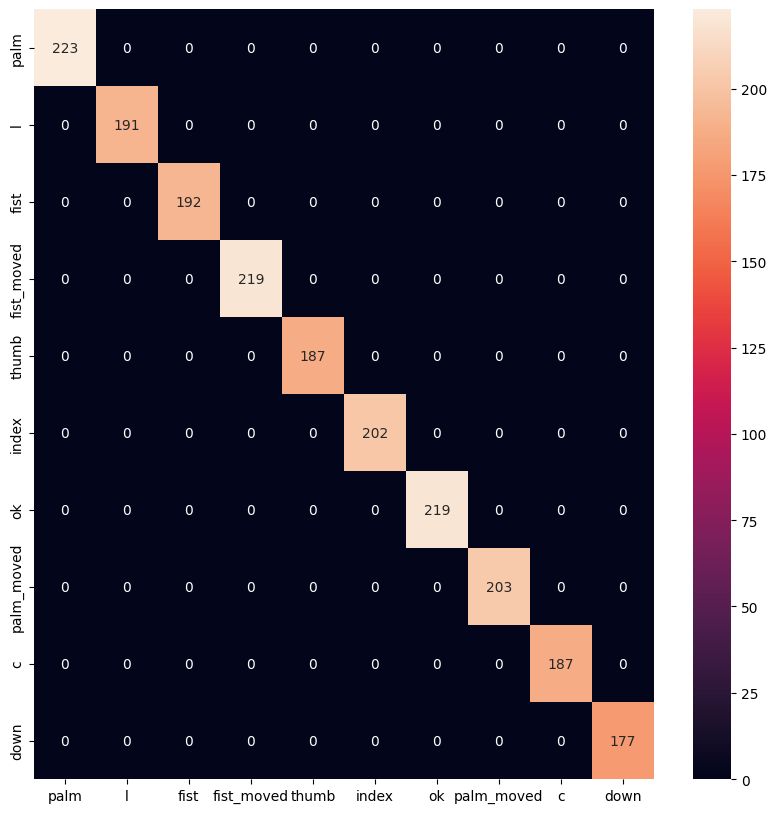

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,fmt='d',xticklabels=cat, yticklabels=cat)
plt.plot()

In [59]:
# # Load the image and resize it to 32x32 pixels
# import requests


# # image1 = Image.open('/content/gdrive/MyDrive/img/cat.jpg')
# #image = Image.open('/content/asd.jpg')

# url = input("Masukan url: ")
# r = requests.get(url, stream=True)  # Download
# image1 = np.array(Image.open(r.raw))

# image = image1.resize((32, 32))

# # Convert the image to a numpy array and normalize its values
# image_array = np.array(image) / 255.0

# # Reshape the image array to (1, 32, 32, 3)
# image_array = image_array.reshape((1, 32, 32, 3))

# # Pass the image through the model to get the predicted class probabilities
# predictions = model.predict(image_array)

# # Get the index of the predicted class with the highest probability
# predicted_class = np.argmax(predictions[0])

# # Get the corresponding label from the class_names list
# label = CATEGORIES[predicted_class]

# plt.imshow(image1)
# plt.show()



1/1 [==============================] - 0s 23ms/step


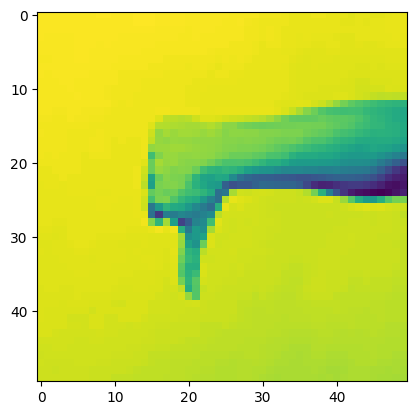

Label : No Palm


In [63]:
# Load the image and resize it to 32x32 pixels
image1 = Image.open('image/jempolB.jpg')
#image = Image.open('/content/asd.jpg')
image = image1.convert('L')
image = image.resize((50, 50))

# Convert the image to a numpy array and normalize its values
image_array = np.array(image) / 255.0


image_array = image_array.reshape((1, 50, 50, 1))  


# Pass the image through the model to get the predicted class probabilities
predictions = model.predict(image_array)

# Get the index of the predicted class with the highest probability
predicted_class = np.argmax(predictions[0])

if predicted_class == 0 :
    label = "palm"
else :
    label = "No Palm"
    
# Get the corresponding label from the class_names list
# label = CATEGORIES[predicted_class]



plt.imshow(image)
plt.show()

print("Label :", label)



